In [1]:
import numpy as np 
# this is the key library for manipulating arrays. Use the online ressources! http://www.numpy.org/

import matplotlib.pyplot as plt 
# used to read images, display and plot http://matplotlib.org/api/pyplot_api.html . 
#You can also check this simple intro to using ipython notebook with images https://matplotlib.org/users/image_tutorial.html

import matplotlib.patches as mpatches

%matplotlib inline 
# to display directly in the notebook

from mpl_toolkits.mplot3d import Axes3D

import sklearn.linear_model as lin

import scipy.ndimage as ndimage
# one of several python libraries for image procession

plt.rcParams['image.cmap'] = 'gray' 
# by default, the grayscale images are displayed with the jet colormap: use grayscale instead

from skimage.color import rgb2lab,lab2rgb
# for colorspace conversions

from scipy.spatial.distance import pdist, squareform
# for merging modes

# Régression linéaire dans R

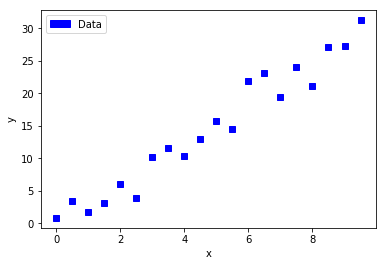

In [2]:
#Nous commençons par générer des échantillons suivant une loi linéaire avec bruit.
x = 0.5 * np.arange(20.)
yl = 3 * x + 2 * np.random.randn(20)
plt.xlabel('x')
plt.ylabel('y')
blue_patch = mpatches.Patch(color='blue', label='Data')
plt.legend(handles=[blue_patch])
plt.plot(x, yl, 'bs')
plt.show()

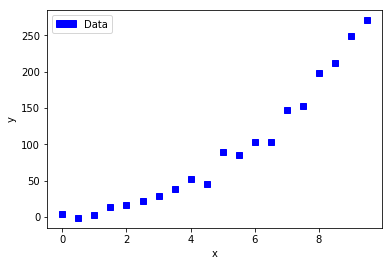

In [3]:
#Et nous générons aussi des échantillons suivant une loi quadratique avec bruit
yq = 3 * x**2 + 10 * np.random.randn(20)
plt.xlabel('x')
plt.ylabel('y')
blue_patch = mpatches.Patch(color='blue', label='Data')
plt.legend(handles=[blue_patch])
plt.plot(x, yq, 'bs')
plt.show()

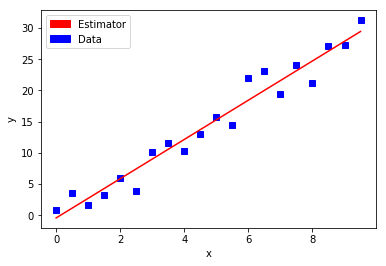

In [4]:
#Nous allons approximer les premières données par une régression linéaire
LinearEstimator = lin.LinearRegression()
LinearEstimator.fit(x.reshape(20, 1), yl)
ypredict = LinearEstimator.predict(x.reshape(20, 1))
plt.xlabel('x')
plt.ylabel('y')
blue_patch = mpatches.Patch(color='blue', label='Data')
red_patch = mpatches.Patch(color='red', label='Estimator')
plt.legend(handles=[red_patch, blue_patch])
plt.plot(x, yl, 'bs')
plt.plot(x, ypredict, 'red')
plt.show()

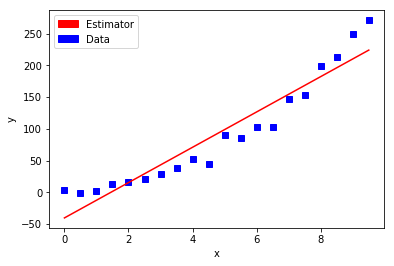

In [5]:
#Nous allons approximer les données quadratiques par une régression linéaire
LinearEstimator = lin.LinearRegression()
LinearEstimator.fit(x.reshape(20, 1), yq)
ypredict = LinearEstimator.predict(x.reshape(20, 1))
plt.xlabel('x')
plt.ylabel('y')
blue_patch = mpatches.Patch(color='blue', label='Data')
red_patch = mpatches.Patch(color='red', label='Estimator')
plt.legend(handles=[red_patch, blue_patch])
plt.plot(x, yq, 'bs')
plt.plot(x, ypredict, 'red')
plt.show()

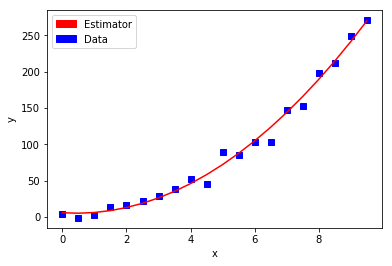

In [6]:
#Nous allons approximer les données quadratiques par une régression quadratique
LinearEstimator = lin.LinearRegression()
LinearEstimator.fit(np.vander(x, 3), yq)
ypredict = LinearEstimator.predict(np.vander(x, 3))
plt.xlabel('x')
plt.ylabel('y')
blue_patch = mpatches.Patch(color='blue', label='Data')
red_patch = mpatches.Patch(color='red', label='Estimator')
plt.legend(handles=[red_patch, blue_patch])
plt.plot(x, yq, 'bs')
plt.plot(x, ypredict, 'red')
plt.show()

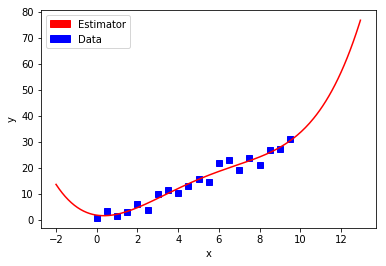

In [7]:
#Nous allons illustrer l'overfitting en approximant par un polynôme de degré trop élevé
LinearEstimator = lin.LinearRegression()
LinearEstimator.fit(np.vander(x, 5), yl)
xbig = 1. / 20. * np.arange(300) - 2
ypredict = LinearEstimator.predict(np.vander(xbig, 5))
plt.xlabel('x')
plt.ylabel('y')
blue_patch = mpatches.Patch(color='blue', label='Data')
red_patch = mpatches.Patch(color='red', label='Estimator')
plt.legend(handles=[red_patch, blue_patch])
plt.plot(x, yl, 'bs')
plt.plot(xbig, ypredict, 'red')
plt.show()

# Clusters

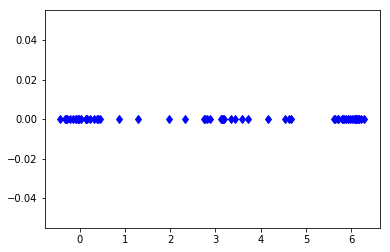

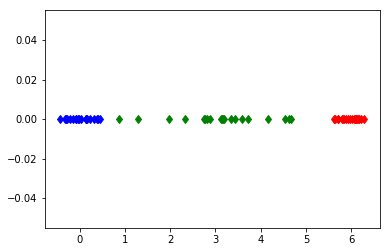

In [8]:
#Nous commençons par générer des clusters dans R
cluster1 = 0.25 * np.random.randn(20)
cluster2 = 3 + 1.  * np.random.randn(20)
cluster3 = 6 + 0.25 * np.random.randn(20)
plt.plot(cluster1, np.zeros(20), 'bd')
plt.plot(cluster2, np.zeros(20), 'bd')
plt.plot(cluster3, np.zeros(20), 'bd')
plt.show()
plt.plot(cluster1, np.zeros(20), 'bd')
plt.plot(cluster2, np.zeros(20), 'gd')
plt.plot(cluster3, np.zeros(20), 'rd')
plt.show()

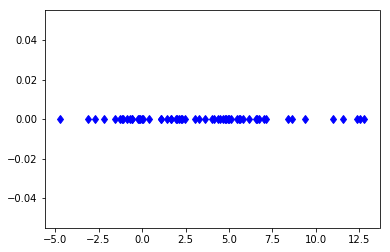

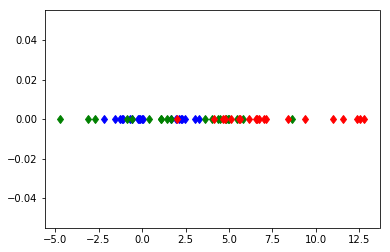

In [9]:
#Nous illustrons une situation de recouvrement dans R
cluster1 = 2. * np.random.randn(20)
cluster2 = 3 + 3.  * np.random.randn(20)
cluster3 = 6 + 3. * np.random.randn(20)
plt.plot(cluster1, np.zeros(20), 'bd')
plt.plot(cluster2, np.zeros(20), 'bd')
plt.plot(cluster3, np.zeros(20), 'bd')
plt.show()
plt.plot(cluster1, np.zeros(20), 'bd')
plt.plot(cluster2, np.zeros(20), 'gd')
plt.plot(cluster3, np.zeros(20), 'rd')
plt.show()

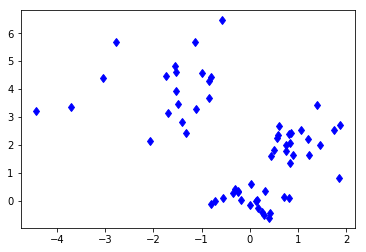

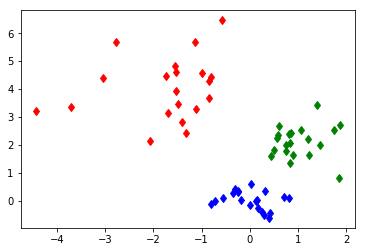

In [10]:
#Nous générons des clusters dans R^2
cluster1 = np.random.multivariate_normal(np.array([0, 0]), np.matrix([[0.25, 0], [0, 0.25]]), 20)
cluster2 = np.random.multivariate_normal(np.array([1, 2]), np.matrix([[0.25, 0], [0, 0.25]]), 20)
cluster3 = np.random.multivariate_normal(np.array([-2, 4]), np.matrix([[1, 0], [0, 1]]), 20)
plt.plot(cluster1[:, 0], cluster1[:, 1], 'bd')
plt.plot(cluster2[:, 0], cluster2[:, 1], 'bd')
plt.plot(cluster3[:, 0], cluster3[:, 1], 'bd')
plt.show()
plt.plot(cluster1[:, 0], cluster1[:, 1], 'bd')
plt.plot(cluster2[:, 0], cluster2[:, 1], 'gd')
plt.plot(cluster3[:, 0], cluster3[:, 1], 'rd')
plt.show()

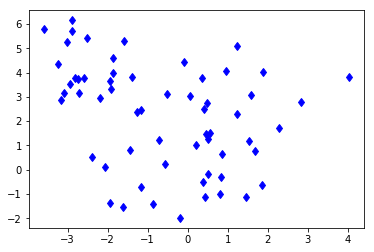

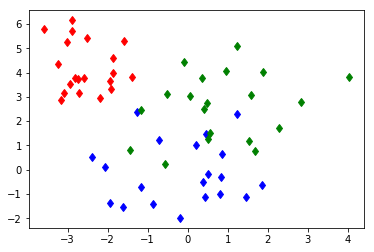

In [11]:
#Nous générons des clusters avec recouvrement dans R^2
cluster1 = np.random.multivariate_normal(np.array([0, 0]), np.matrix([[2, 0], [0, 2]]), 20)
cluster2 = np.random.multivariate_normal(np.array([1, 2]), np.matrix([[2, 0], [0, 2]]), 20)
cluster3 = np.random.multivariate_normal(np.array([-2, 4]), np.matrix([[1, 0], [0, 1]]), 20)
plt.plot(cluster1[:, 0], cluster1[:, 1], 'bd')
plt.plot(cluster2[:, 0], cluster2[:, 1], 'bd')
plt.plot(cluster3[:, 0], cluster3[:, 1], 'bd')
plt.show()
plt.plot(cluster1[:, 0], cluster1[:, 1], 'bd')
plt.plot(cluster2[:, 0], cluster2[:, 1], 'gd')
plt.plot(cluster3[:, 0], cluster3[:, 1], 'rd')
plt.show()

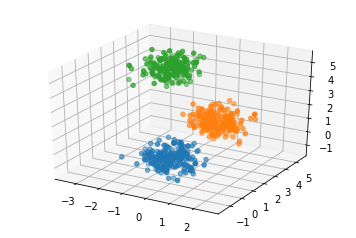

In [12]:
#Nous générons des clusters dans R^3
cluster1 = np.random.multivariate_normal(np.array([0, 0, 0]), np.matrix([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]]), 200)
cluster2 = np.random.multivariate_normal(np.array([1, 2, 2]), np.matrix([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]]), 200)
cluster3 = np.random.multivariate_normal(np.array([-2, 4, 4]), np.matrix([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]]), 200)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1[:, 0], cluster1[:, 1], cluster1[:, 2])
ax.scatter(cluster2[:, 0], cluster2[:, 1], cluster2[:, 2])
ax.scatter(cluster3[:, 0], cluster3[:, 1], cluster3[:, 2])
plt.show()

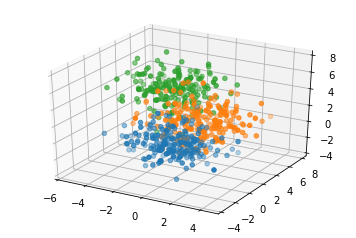

In [13]:
#Nous générons des clusters avec recouvrement dans R^3
cluster1 = np.random.multivariate_normal(np.array([0, 0, 0]), np.matrix([[2, 0, 0], [0, 2, 0], [0, 0, 2]]), 200)
cluster2 = np.random.multivariate_normal(np.array([1, 2, 2]), np.matrix([[2, 0, 0], [0, 2, 0], [0, 0, 2]]), 200)
cluster3 = np.random.multivariate_normal(np.array([-2, 4, 4]), np.matrix([[2, 0, 0], [0, 2, 0], [0, 0, 2]]), 200)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1[:, 0], cluster1[:, 1], cluster1[:, 2])
ax.scatter(cluster2[:, 0], cluster2[:, 1], cluster2[:, 2])
ax.scatter(cluster3[:, 0], cluster3[:, 1], cluster3[:, 2])
plt.show()

# K-Means

In [54]:
def KM_step(data, centers, affil, find_cluster):
    n, p = data.shape
    k, _ = centers.shape
    has_changed = False 
    for i in range(n):
        j = np.argsort(np.linalg.norm(centers - data[i, :], axis=1))[0]
        has_changed = has_changed or (find_cluster[i] != j)
        affil[i, int(find_cluster[i])] = 0.
        find_cluster[i] = j
        affil[i, j] = 1.
    for j in range(k):
        nb_affil = np.sum(affil[:, j])
        if nb_affil != 0:
            centers[j] = np.dot( np.transpose(affil[:, j]), data) / nb_affil
    return has_changed

def KM(data, centers, affil):
    n, p = data.shape
    k, _ = centers.shape
    find_cluster = np.zeros(n)
    for i in range(n):
        find_cluster[i] = np.argsort(affil[i, :])[-1]
    while KM_step(data, centers, affil, find_cluster):
        pass
    return(find_cluster)
        
    

In [55]:
data1 = np.random.multivariate_normal(np.array([0, 0]), 0.25 * np.eye(2), 10)
data2 = np.random.multivariate_normal(np.array([5, 0]), 0.25 * np.eye(2), 10)
data3 = np.random.multivariate_normal(np.array([10, 0]), 0.25 * np.eye(2), 10)
data = np.concatenate((data1, data2, data3), axis = 0)
centers1 = np.random.multivariate_normal(np.array([0, 0]), 0.25 * np.eye(2), 1)
centers2 = np.random.multivariate_normal(np.array([5, 0]), 0.25 * np.eye(2), 1)
centers3 = np.random.multivariate_normal(np.array([10, 2]), 0.25 * np.eye(2), 1)
centers = np.concatenate((centers1, centers2, centers3), axis = 0)
affil = np.zeros((30, 3))
for i in range(10):
    affil[3*i, 0] = 1.
    affil[3*i + 1, 1] = 1.
    affil[3*i + 2, 2] = 1.
clusters = KM(data, centers, affil)

In [56]:
clusters

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

# Mean Shift

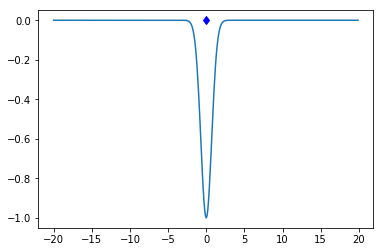

In [16]:
#Nous commençons par représenter la fonction associée à un point dans R
x = 1/10. * np.arange(400.) - 20
y = - np.exp(- x**2)
plt.plot(x, y)
plt.plot(0, 0, 'bd')

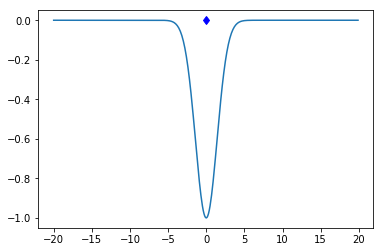

In [17]:
x = 1/10. * np.arange(400.) - 20
y = - np.exp(- 0.25 * x**2)
plt.plot(x, y)
plt.plot(0, 0, 'bd')

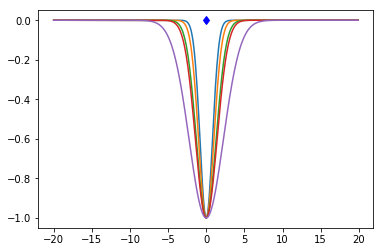

In [18]:
x = 1/10. * np.arange(400.) - 20
y1 = - np.exp(- 0.75 * x**2)
y2 = - np.exp(- 0.5 * x**2)
y3 = - np.exp(- 0.3 * x**2)
y4 = - np.exp(- 0.25 * x**2)
y5 = - np.exp(- 0.1 * x**2)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.plot(0, 0, 'bd')

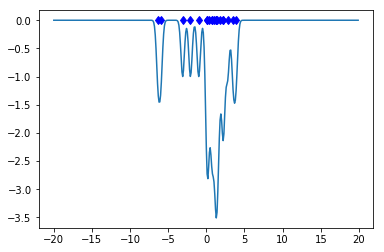

In [19]:
#Nous pouvons maintenant illustrer ce que ça donne avec plusieurs points et différents paramètres
x = 1/10. * np.arange(400.) - 20
points = 3 * np.random.randn(20)
y = np.zeros(400)
for k in range(20):
    y -= np.exp(- 10 * (x - points[k])**2)
    plt.plot(points[k], 0, 'bd')
plt.plot(x, y)

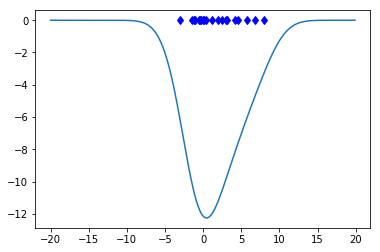

In [20]:
x = 1/10. * np.arange(400.) - 20
points = 3 * np.random.randn(20)
y = np.zeros(400)
for k in range(20):
    y -= np.exp(- 0.1 *  (x - points[k])**2)
    plt.plot(points[k], 0, 'bd')
plt.plot(x, y)

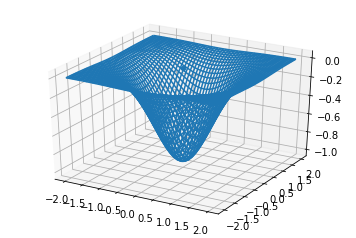

In [21]:
#Nous allons maintenant faire la même chose dans R^2
x = 1/100. * np.arange(400.) - 2
y = 1/100. * np.arange(400.) - 2
X, Y = np.meshgrid(x, y)
z = - np.exp(- (X**2 + Y ** 2))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0, 0, 0, 'p')
ax.plot_wireframe(X, Y, z )
plt.show()

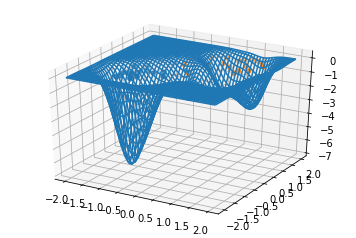

In [22]:
x = 1/100. * np.arange(400.) - 2
y = 1/100. * np.arange(400.) - 2
X, Y = np.meshgrid(x, y)
cluster1 = np.random.multivariate_normal(np.array([-0.75, -0.75]), np.matrix([[0.25, 0], [0, 0.25]]), 20)
cluster2 = np.random.multivariate_normal(np.array([0.75, 0.75]), np.matrix([[0.25, 0], [0, 0.25]]), 20)
z = np.zeros((400, 400))
for k in range(20):
    z -= np.exp(- 10 * ((X - cluster1[k, 1])**2 + (Y - cluster1[k, 0])** 2))
    z -= np.exp(- 10 * ((X - cluster2[k, 1])**2 + (Y - cluster2[k, 0])** 2))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1[:, 0], cluster1[:, 1], 0)
ax.scatter(cluster2[:, 0], cluster2[:, 1], 0)
ax.plot_wireframe(X, Y, z )
plt.show()

Maintenant nous allons nous attaquer à l'algorithme de Mean Shift. Je tiens à remercier Florentin Guth pour ses fragments de code qu'il m'a fourni et ainsi m'avoir permi un gain de temps non négliguable

In [23]:
class UnionFind:
    def __init__(self, n):
        self.n = n
        self.parent = np.arange(n)
        self.rank = np.zeros(n)
        
    def find(self, i):
        pi = self.parent[i]
        if pi == i:
            return i
        ppi = self.find(pi)
        self.parent[i] = ppi
        return ppi
    
    def union(self, i, j):
        pi = self.find(i)
        pj = self.find(j)        
        if pi != pj:
            ri = self.rank[pi]
            rj = self.rank[pj]
            if ri < rj:
                self.parent[pi] = pj
            else:
                self.parent[pj] = pi
                if ri == rj:
                    self.rank[pi] += 1
    
    def classes(self):
        cs = -np.ones(self.n)
        c = 0
        for i in range(self.n):
            pi = self.find(i)
            if cs[pi] == -1:
                cs[pi] = c
                c += 1
            cs[i] = cs[pi]
        return cs

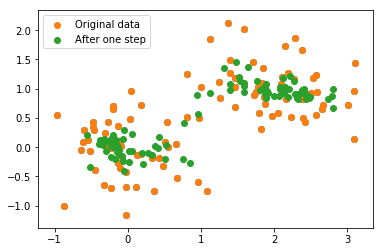

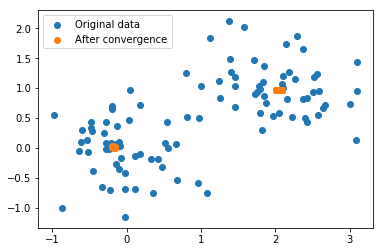

In [24]:
data = np.concatenate((np.random.multivariate_normal(np.zeros(2), 0.25 * np.eye(2), 50),
                       np.random.multivariate_normal(np.array([2,1]), 0.25 * np.eye(2), 50)))
σ = 1/np.array([2, 1])

def plot_data(data, *args, **kwargs):
    plt.scatter(data[:,0], data[:,1], *args, **kwargs)
plot_data(data)

def MS_step(data, x, σ):
    def g(x):
        return np.exp(-x)
    weights = g(np.sum(((x - data) / σ)**2, axis=1))
    return np.sum((data.T * weights).T, axis=0) / np.sum(weights)

def plot_function(f, s):
    plot_data(data, label="Original data")
    n, d = data.shape
    step = np.zeros((n, d))
    for i in range(n):
        step[i] = f(data, data[i], σ)
    plot_data(step, label=s)
    plt.legend()

plot_function(MS_step, "After one step")
plt.show()

def MS_point(data, x, σ):
    ɛ = 0.01
    while True:
        new = MS_step(data, x, σ)
        if np.linalg.norm(new - x) <= ɛ:
            break
        x = new
    return x

plot_function(MS_point, "After convergence")
plt.show()

In [25]:
def MS(data, σ):
    n, d = data.shape
    
    # Compute modes (without clustering).
    modes = np.zeros((n, d))
    for i in range(n):
        modes[i] = MS_point(data, data[i], σ)
    dists = squareform(pdist(modes, w=1/σ))
    
    # Computes labels by clustering.
    u = UnionFind(n)
    for i in range(n):
        for j in range(i+1, n):
            if dists[i][j] <= 0.5:
                u.union(i, j)
    labels = u.classes()
    num_labels = int(np.max(labels)) + 1
    
    # Now averages modes over all labels.
    for k in range(num_labels):
        I_k = (labels == k)
        modes[I_k] = np.average(modes[I_k], axis=0)
    
    return labels, modes

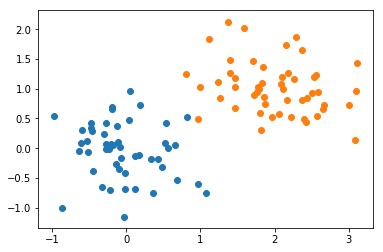

In [26]:
n, d = data.shape
labels, modes = MS(data, σ)
num_labels = int(np.max(labels)) + 1
for k in range(num_labels):
    plot_data(data[labels == k])

In [27]:
#I = rgb2lab(plt.imread("lenna.jpeg"))
#n, m, _ = I.shape
#X, Y = np.meshgrid(np.arange(m), np.arange(n))
#I = np.concatenate((I, X[:,:,None], Y[:,:,None]), axis=2).reshape((-1, 5))
#σ = 4*np.array([20, 5, 5, 1, 1])
#labels, modes = MS(I, σ)
#num_labels = int(np.max(labels)) + 1

#print("{} classes".format(num_labels))
#plt.figure(figsize=(10,10))
#plt.imshow(lab2rgb(modes[:,:3].reshape((n,m,3))))
#plt.figure(figsize=(10,10))
#for k in range(num_labels):
#    coords = I[labels == k,3:]
#    coords[:,1] = -coords[:,1]
#    plot_data(coords)